In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# computation
import numpy as np
import tensorflow as tf
import prettytensor as pt

# utility funcs
from numpy.random import uniform
from datetime import datetime
from scipy.stats import norm

# visualization
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import HTML
from matplotlib import animation
import seaborn as sns
%matplotlib inline

# model
from Network.GAN import GAN

In [3]:
def viz_data(data, i):
    """Plot a scatterplot of the given data"""
    assert data.shape[1] == 1
    f, ax = plt.subplots(figsize=(6,4))
    # plot p_data
    x = np.linspace(-3,5,1000)
    y = norm.pdf(x, loc=1, scale=1)    # for example
    ax.plot(x,y, label='p_data')

    # draw data
    sns.distplot(data, label='data', norm_hist=True, ax=ax)
    
    # draw decision boundary
    f.suptitle('1D Generative Adversarial Network', fontsize=15)
    frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    frame_text.set_text('Timestep = %.1d' % i)
    
    plt.legend()

In [4]:
data = uniform(-3,5, size=(20000,1))

In [5]:
g = GAN(hyper_params={'batch_size': 20000})

Building tensorflow graph
8
4


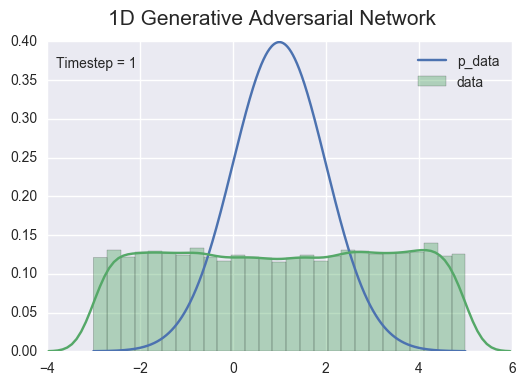

In [6]:
viz_data(uniform(-3,5, size=(20000,1)), 1)

In [7]:
dec = g.decode()
viz_data(dec, 0)

InternalError: Blas SGEMM launch failed : a.shape=(20000, 1), b.shape=(1, 5), m=20000, n=5, k=1
	 [[Node: fully_connected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](flatten/reshape/Reshape, fully_connected/weights/read)]]
	 [[Node: fully_connected_1/Tanh/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_13_fully_connected_1/Tanh", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'fully_connected/MatMul', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-85da78735a7a>", line 1, in <module>
    g = GAN(hyper_params={'batch_size': 20000})
  File "/home/spotlight/git/deeplearning-seminar/code/Network/GAN.py", line 45, in __init__
    self._build_graph()
  File "/home/spotlight/git/deeplearning-seminar/code/Network/GAN.py", line 72, in _build_graph
    self.output_g = self._build_generator(self.noise_tensor)
  File "/home/spotlight/git/deeplearning-seminar/code/Network/GAN.py", line 115, in _build_generator
    .fully_connected(self.h_dim)
  File "/usr/lib/python3.5/site-packages/prettytensor/pretty_tensor_class.py", line 1981, in method
    result = func(non_seq_layer, *args, **kwargs)
  File "/usr/lib/python3.5/site-packages/prettytensor/pretty_tensor_methods.py", line 356, in __call__
    y = tf.matmul(input_layer, params, transpose_b=transpose_weights)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1398, in matmul
    name=name)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1348, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(20000, 1), b.shape=(1, 5), m=20000, n=5, k=1
	 [[Node: fully_connected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](flatten/reshape/Reshape, fully_connected/weights/read)]]
	 [[Node: fully_connected_1/Tanh/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_13_fully_connected_1/Tanh", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
for i in range(0,5000):
    g.train(data, num_epochs = 5, modulo=1, output = False)
    plt.clf()
    viz_data(g.decode(), i)
    plt.savefig('anim/step_{:05}.png'.format(i))
    display.display(plt.gcf())
    display.clear_output(wait=True)